In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# Importing seaborn sets nice default options for plotting but is not necessary
import seaborn as sns

import calliope

In [2]:
model = calliope.examples.NationalScale()

In [3]:
# Construct and solve the model. Results are loaded into `model.solution`.

model.run()

In [4]:
# `model.solution` is an xarray.Dataset which with the different variables
# indexed by dimensions including x (locations), y (technology), t (time),
# k (cost class), c (carrier), alongside several additional dimensions used
# in some of the summary variables such as `summary` and `metadata`

# Model and run configuration is attached to the Dataset as `config_run` and
# `config_model` attributes

model.solution

<xarray.Dataset>
Dimensions:          (c: 1, cols_groups: 3, cols_metadata: 6, cols_shares: 3, cols_summary: 8, k: 1, t: 120, techs: 12, x: 5, y: 7)
Coordinates:
  * c                (c) object 'power'
  * y                (y) object 'ac_transmission:region1' ...
  * x                (x) object 'region1' 'region1-1' 'region1-2' ...
  * t                (t) datetime64[ns] 2005-01-01 2005-01-01T01:00:00 ...
  * k                (k) object 'monetary'
  * cols_metadata    (cols_metadata) object 'type' 'name' 'carrier_in' ...
  * techs            (techs) object 'ac_transmission' 'battery' 'ccgt' 'csp' ...
  * cols_summary     (cols_summary) object 'cf' 'levelized_cost_monetary' ...
  * cols_groups      (cols_groups) object 'members' 'group' 'type'
  * cols_shares      (cols_shares) object 'e_prod' 'e_con' 'e_cap'
Data variables:
    e                (c, y, x, t) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    s                (y, x, t) float64 nan nan nan nan nan nan nan nan nan ...
    r  

In [5]:
# We can sum power output over all locations and turn the result into
# a pandas DataFrame

df_power = model.solution['e'].loc[dict(c='power')].sum(dim='x').to_pandas().T

df_power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2005-01-01 00:00:00 to 2005-01-05 23:00:00
Data columns (total 7 columns):
ac_transmission:region1    120 non-null float64
ac_transmission:region2    120 non-null float64
battery                    120 non-null float64
ccgt                       120 non-null float64
csp                        120 non-null float64
demand_power               120 non-null float64
unmet_demand_power         120 non-null float64
dtypes: float64(7)
memory usage: 7.5 KB


In [6]:
# Using .head() to see the first few rows of power generation and demand

# hvac:r1 is power "produced" in r1 by the high-voltage line connecting it to r2,
# hvac:r2 is power consumed in r2 by that same high-voltage line

df_power.head()

y,ac_transmission:region1,ac_transmission:region2,battery,ccgt,csp,demand_power,unmet_demand_power
t,,,,,,,
2005-01-01 00:00:00,3476.049303,-4089.469769,0.000000,30000.000000,0.0,-29783.769136,397.189601
2005-01-01 01:00:00,4257.412603,-5008.720710,-595.439901,30000.000000,0.0,-28653.251992,0.000000
2005-01-01 02:00:00,4591.549489,-5401.822929,-1000.000000,29720.056078,0.0,-27909.782639,0.000000
2005-01-01 03:00:00,4661.972702,-5484.673767,-1000.000000,29180.246188,0.0,-27357.545123,0.000000
2005-01-01 04:00:00,4732.395915,-5567.524606,-1000.000000,29259.571852,0.0,-27424.443161,0.000000


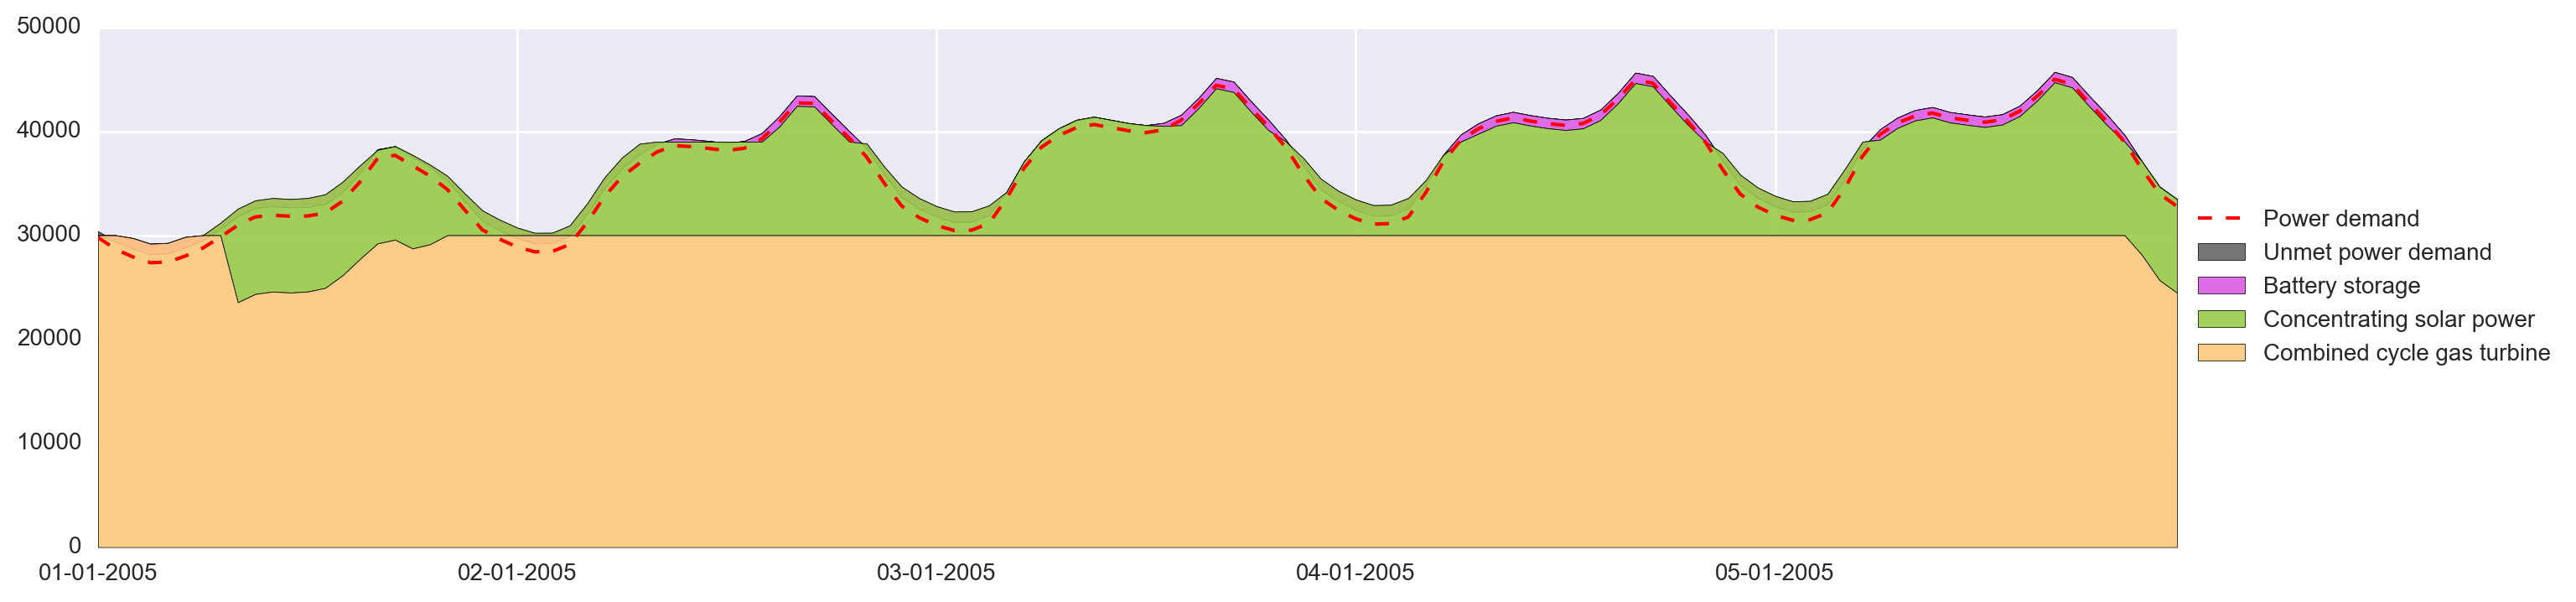

In [7]:
# We can plot this by using the plot_carrier_production function
# Note this is using the colors, names, and stack_weights defined for
# each technology in the model configuration

calliope.analysis.plot_carrier_production(model.solution, carrier='power')

(0, 35000)

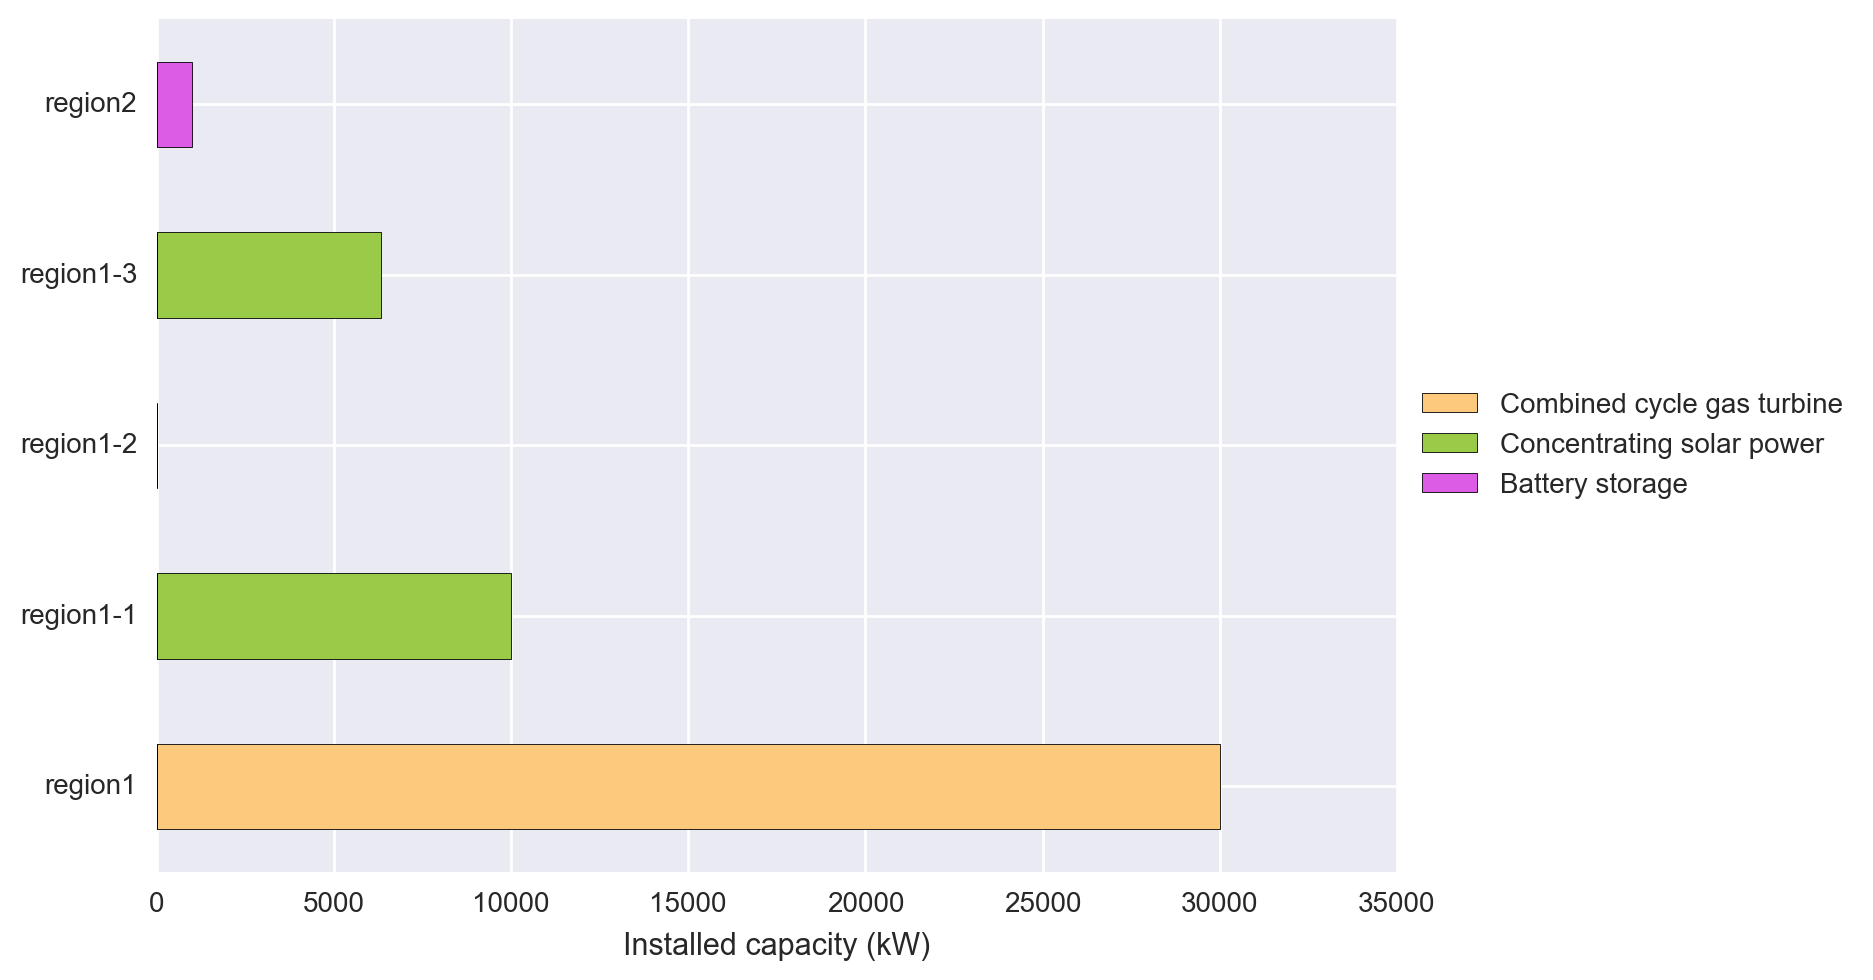

In [8]:
# plot_installed_capacities gives a graphical view of the `e_cap` variable
# for supply technologies

calliope.analysis.plot_installed_capacities(model.solution)
plt.xlim(0, 35000)

In [9]:
# We can also examine total technology costs

costs =  model.solution['costs'].loc[dict(k='monetary')].to_pandas()
costs

x,region1,region1-1,region1-2,region1-3,region2
y,,,,,
ac_transmission:region1,0.000000,0.000000,0.0,0.000000,1.875354e+03
ac_transmission:region2,876.934647,0.000000,0.0,0.000000,0.000000e+00
battery,0.000000,0.000000,0.0,0.000000,6.820034e+03
ccgt,175683.017506,0.000000,0.0,0.000000,0.000000e+00
csp,0.000000,115150.814635,0.0,45194.928677,0.000000e+00
demand_power,0.000000,0.000000,0.0,0.000000,0.000000e+00
unmet_demand_power,0.000000,0.000000,0.0,0.000000,3.971896e+11


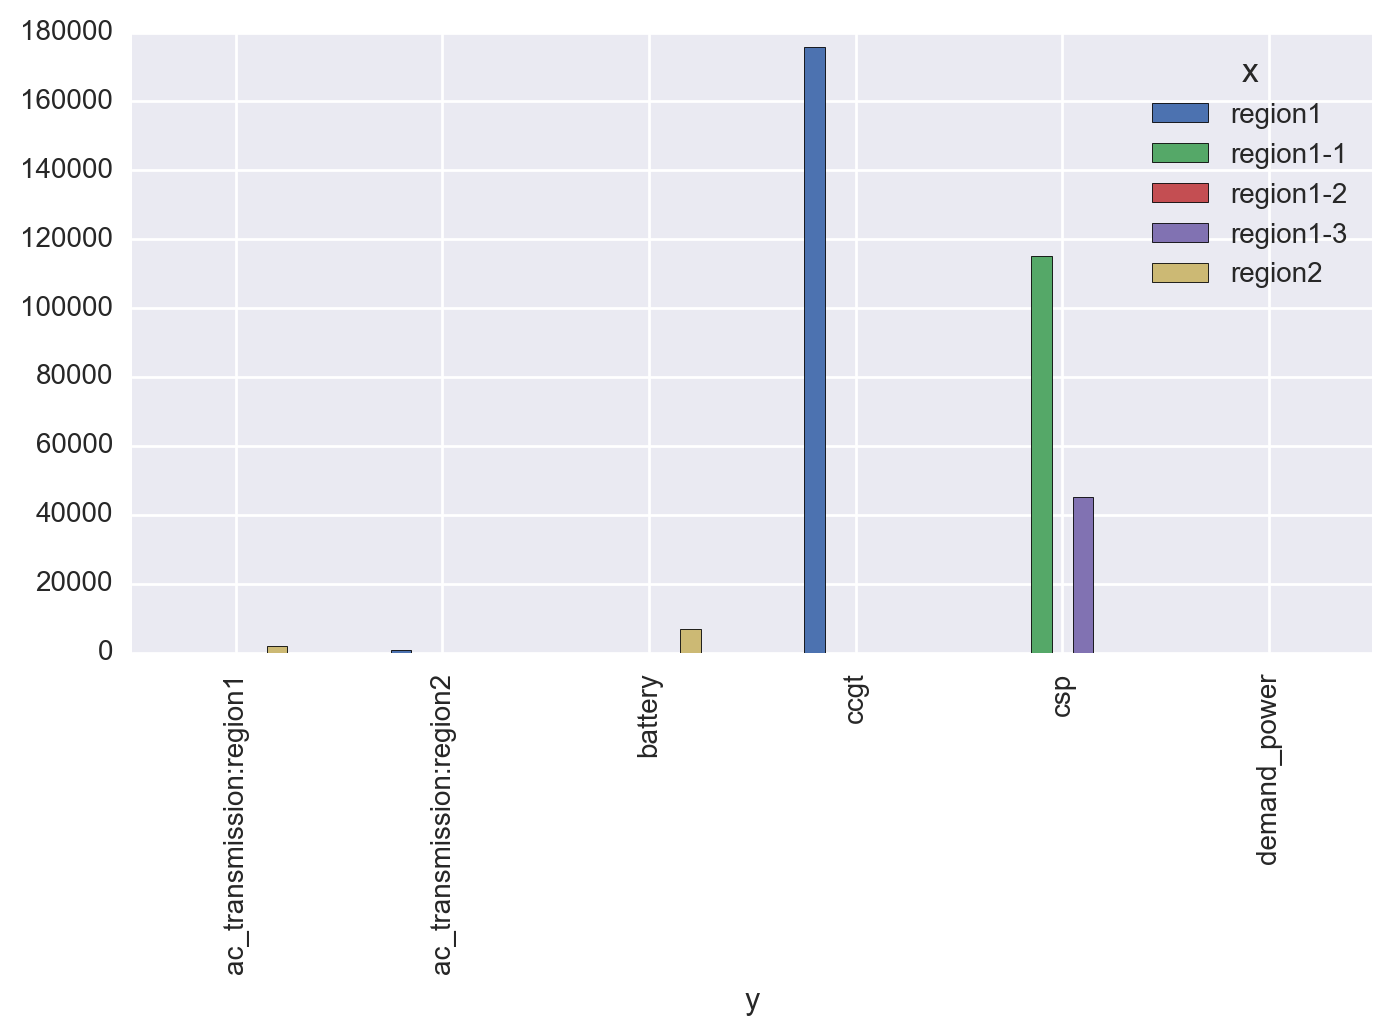

In [10]:
costs.drop('unmet_demand_power', axis=0).plot.bar(figsize=(8, 4))

In [11]:
# We can examine levelized costs for each location and technology

lcoes = model.solution['levelized_cost'].loc[dict(c='power', k='monetary')].to_pandas()
lcoes

y,ac_transmission:region1,ac_transmission:region2,battery,ccgt,csp,demand_power,unmet_demand_power
x,,,,,,,
region1,NaN,0.0,NaN,0.049583,NaN,NaN,NaN
region1-1,NaN,NaN,NaN,NaN,0.139644,NaN,NaN
region1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region1-3,NaN,NaN,NaN,NaN,0.421565,NaN,NaN
region2,0.003757,NaN,0.162409,NaN,NaN,NaN,1.000000e+09


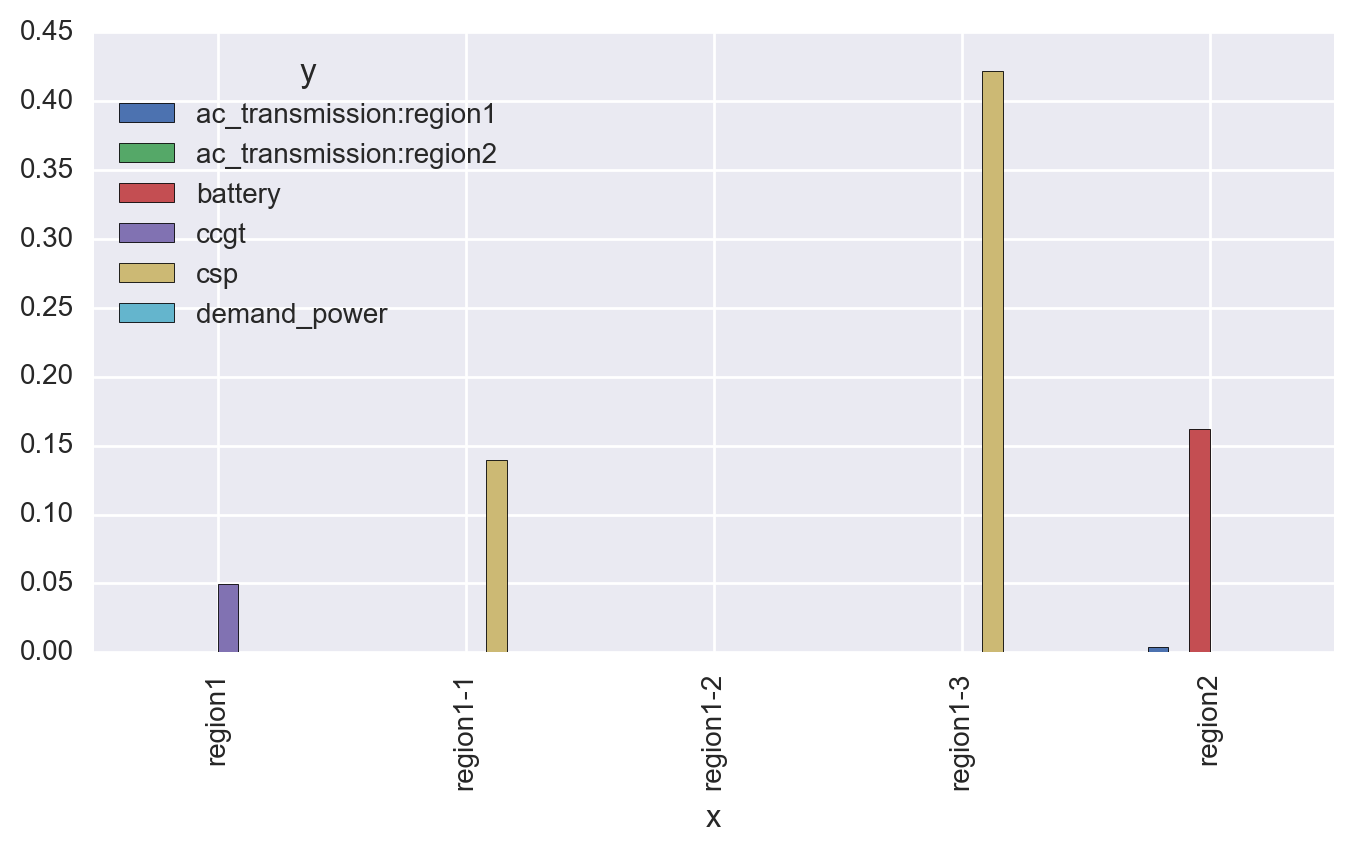

In [12]:
lcoes.drop('unmet_demand_power', axis=1).plot.bar(figsize=(8, 4))

In [13]:
# And we can get an aggregated summary of results

model.solution['summary'].to_pandas().dropna(how='all')

cols_summary,cf,levelized_cost_monetary,e_prod,e_con,e_cap,r_area,s_cap,r_cap
techs,,,,,,,,
ac_transmission,0.715925,3.756645e-03,4.992099e+05,-5.873057e+05,11621.557496,0.000000,0.000000,0.000000
battery,0.349942,1.624088e-01,4.199300e+04,-4.652964e+04,1000.000000,0.000000,22595.587163,0.000000
ccgt,0.984216,4.958346e-02,3.543178e+06,0.000000e+00,30000.000000,0.000000,0.000000,0.000000
csp,0.528026,1.720797e-01,9.318108e+05,0.000000e+00,16339.869281,222579.068638,487540.531195,98906.677002
demand_power,0.000000,NaN,0.000000e+00,-4.382753e+06,45000.000000,0.000000,0.000000,0.000000
unmet_demand_power,0.008333,1.000000e+09,3.971896e+02,0.000000e+00,397.189601,0.000000,0.000000,0.000000


In [14]:
# Get levelized cost of power supply at specific locations
# (excluding transmission costs by default)

calliope.analysis.get_levelized_cost(
    model.solution,
    locations=['region1-1', 'region1-2', 'region1-3']
)

x,region1-1,region1-2,region1-3
y,,,
ccgt,NaN,NaN,NaN
csp,0.139644,NaN,0.421565


In [15]:
# Get overall levelized cost of power supply from different technologies

calliope.analysis.get_levelized_cost(model.solution)

y
ccgt    0.049583
csp     0.172080
dtype: float64

In [16]:
# Get overall levelized cost of delivered power in the system

calliope.analysis.get_delivered_cost(model.solution)

0.078854791951809736

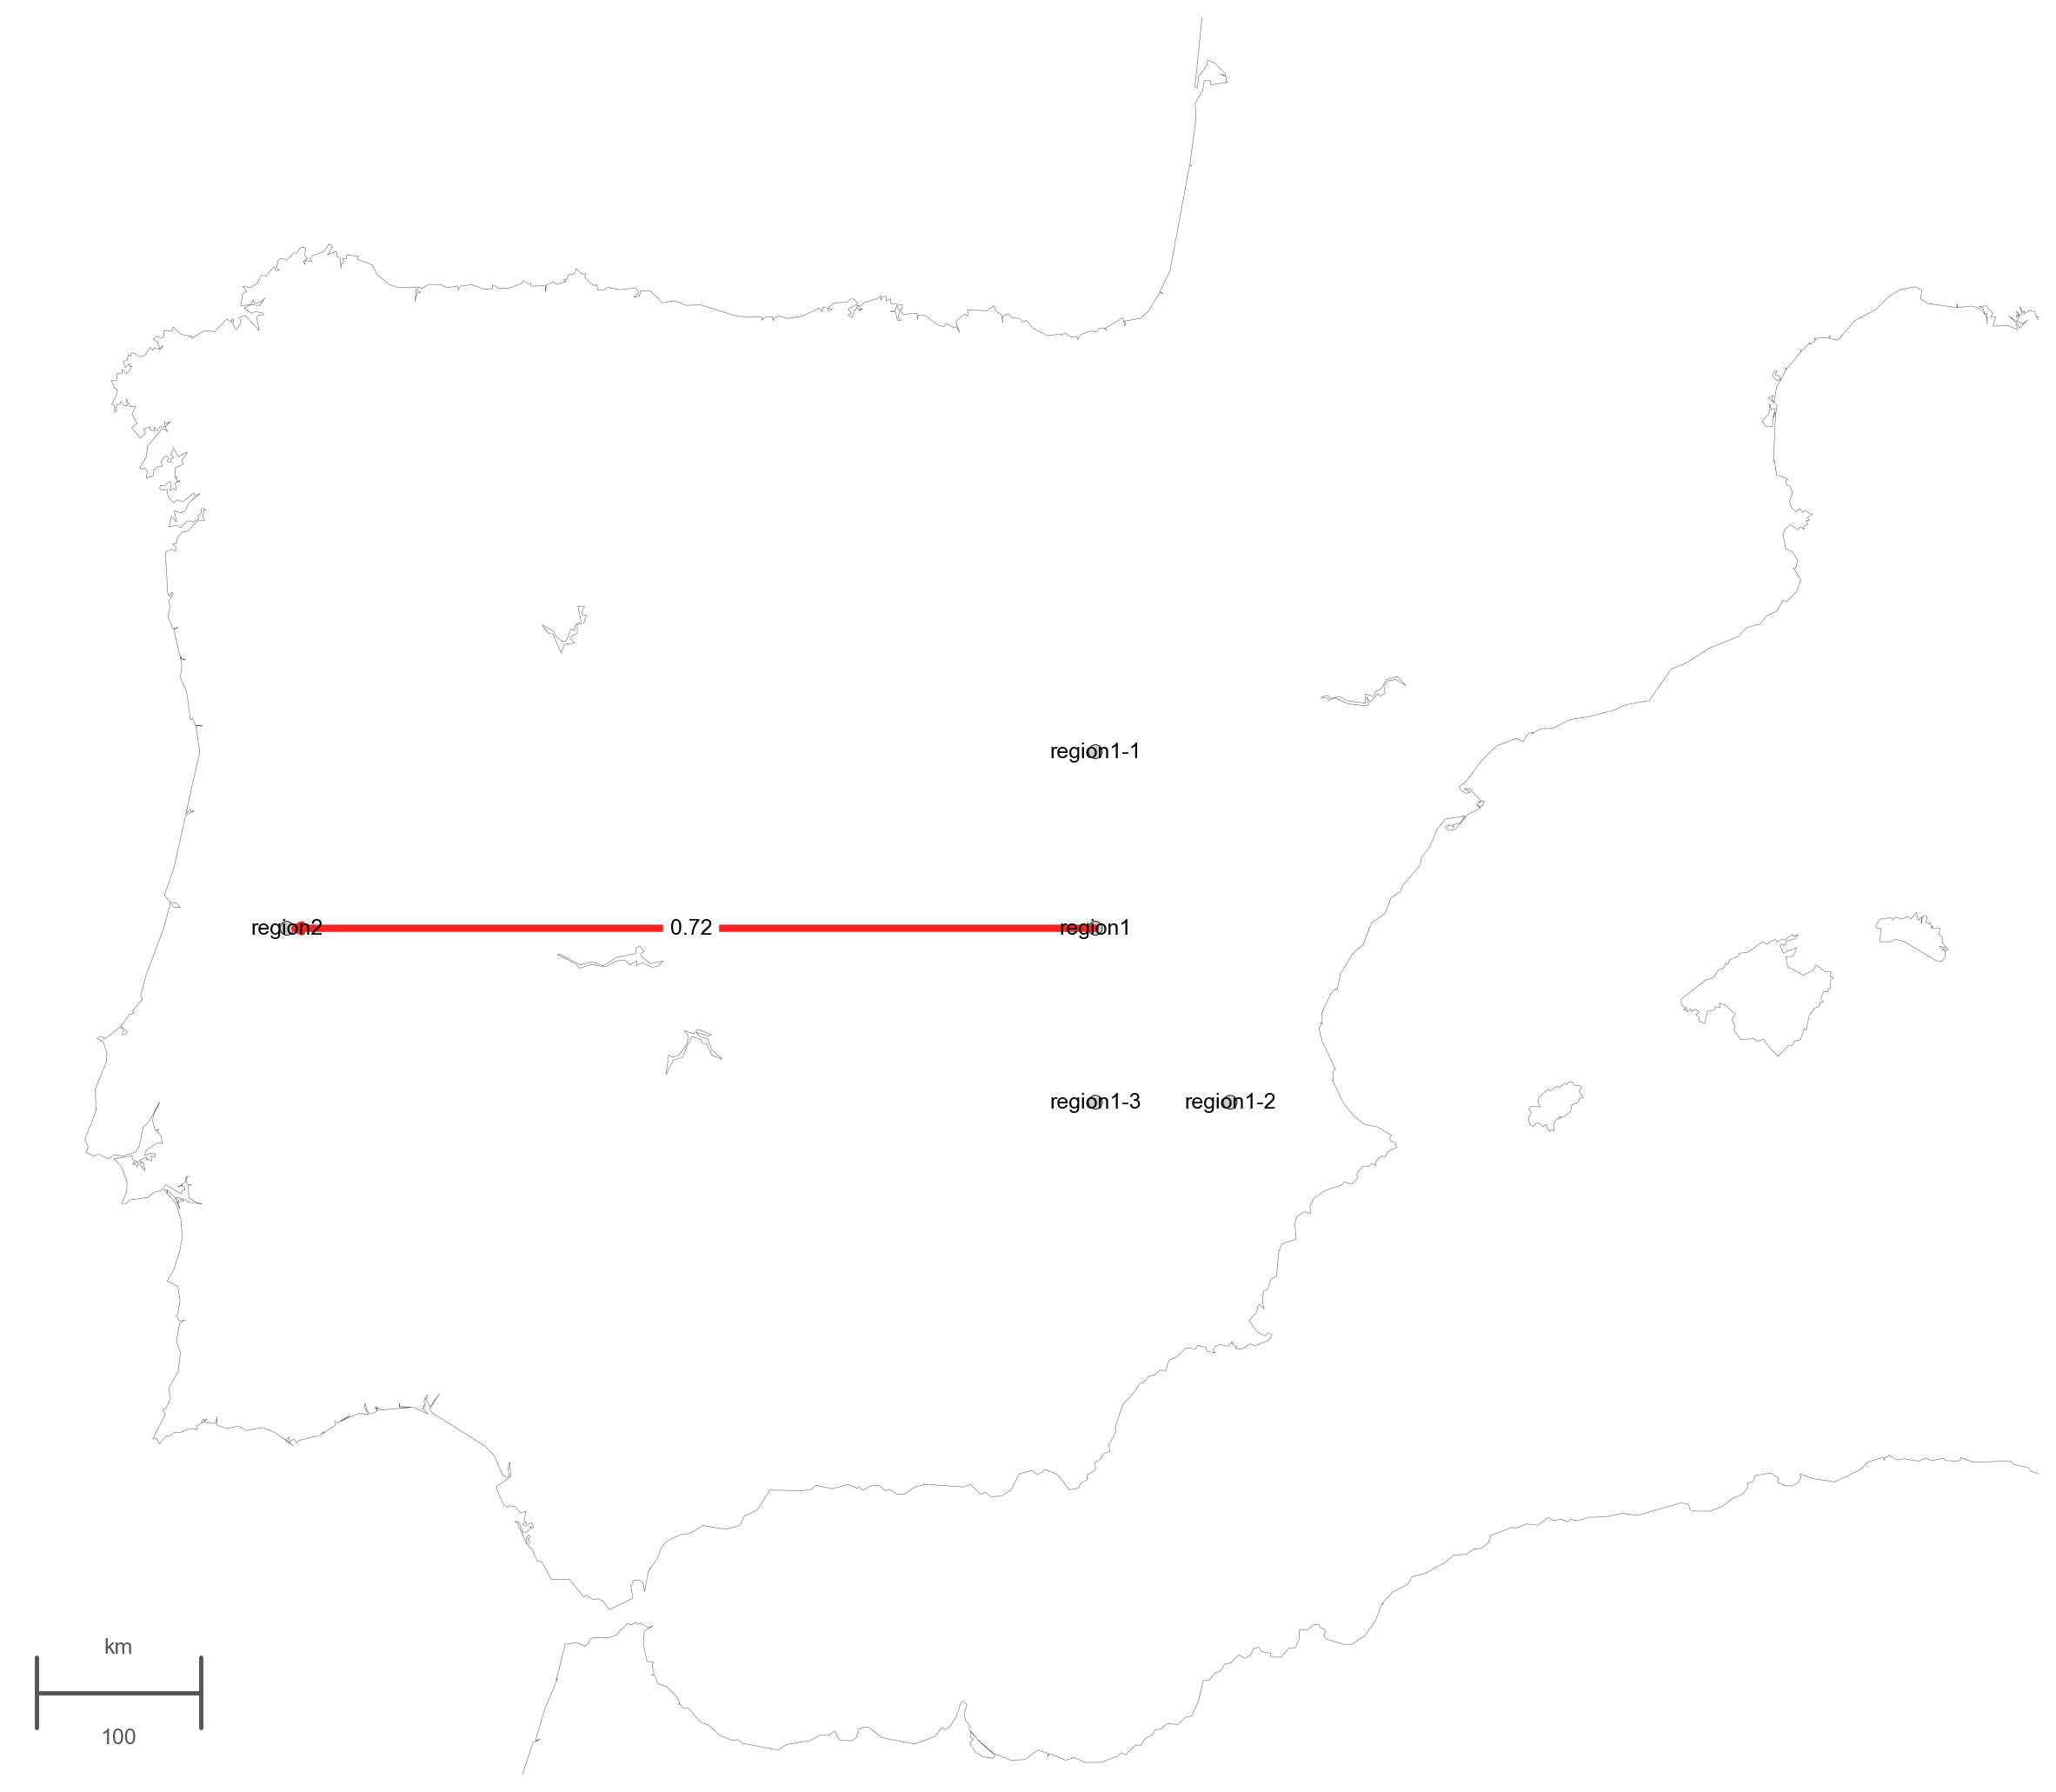

In [17]:
# Plotting a map of locations and transmission lines is easily possible
# In our example, the system is purely hypothetical and the resulting map
# gives us little useful information...

calliope.analysis.plot_transmission(model.solution)

---

The ``calliope.analysis`` and ``calliope.analysis_utils`` modules provide numerous additional functions to analyze and plot model results. Their documentation is still work in progress.

See the [Calliope documentation](https://calliope.readthedocs.io/) for more details on setting up and running a Calliope model.
